In [1]:
#import some packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import math
import re
import pprint
from datetime import datetime
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import emoji
from nltk.stem.snowball import EnglishStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
                           
stop_words = nltk.corpus.stopwords.words("english")


sns.set_theme(style="darkgrid")


from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [2]:
df_tweet = pd.read_csv("/Users/crisandres/Documents/ErdosProject/AustralianElections/TrainingModel/Data/200-thousand-tweets.csv",
                           encoding='latin-1',
                           usecols=[0,5],
                           names=["sentiment", "text"])

In [3]:
df_tweet

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
199995,4,Just woke up. Having no school is the best fee...
199996,4,TheWDB.com - Very cool to hear old Walt interv...
199997,4,Are you ready for your MoJo Makeover? Ask me f...
199998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
stemmer = EnglishStemmer()

def remove_stop_words(doc):
    words = doc.split()
    words = [word for word in words if not word in stop_words]
    words =  [word for word in words if word.isalnum()]
    processed_text = " ".join(words)
    return processed_text

def remove_emojis(doc):
    return emoji_pattern.sub(r'', doc)

def remove_url(doc):
    return re.sub(r'http\S+', '',doc)

def remove_hashsymbol(doc):
    return doc.replace('#',"")


analyzer = CountVectorizer().build_analyzer()
def stemming(doc):
    return " ".join([stemmer.stem(w) for w in analyzer(doc)]
    )

#Comment the ones you dont want to use. I don't know what is the best option
def tweet_preprocess(doc):
   text_temp = doc
   #text_temp = remove_url(text_temp)
   #text_temp = remove_emojis(text_temp)
   #text_temp = remove_hashsymbol(text_temp)
   #text_temp = remove_stop_words(text_temp)
   text_temp = stemming(text_temp)
   return text_temp

def clean_text(text):
    """
    Return clean text
    params
    ------------
        text: string
    """

    text = text.lower() # Lowercase
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if not t in stopwords] # Remove stopwords
    tokens = [t for t in tokens if t.isalnum()] # Remove punctuation
    text_clean = " ".join(tokens)
    
    return text_clean

In [5]:
#training_count = 10000
#test_count = 200
#total_count = training_count + test_count
total_count = 200000
data = df_tweet.sample(n=total_count, random_state=100).reset_index(drop=True)
data['text'] = [tweet_preprocess(text) for text in data['text']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(list(data['text']), list(data['sentiment']), test_size=0.33, random_state=42)

/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,clf__alpha,tfidf__use_idf,vect__ngram_range,vect__stop_words,Accuracy,0
3,0.010,True,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.540993,SGDClassifier
2,0.010,True,"(1, 2)",None,0.561851,SGDClassifier
1,0.010,True,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.623396,SGDClassifier
7,0.010,False,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.629179,SGDClassifier
6,0.010,False,"(1, 2)",None,0.652164,SGDClassifier
5,0.010,False,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.659545,SGDClassifier
4,0.010,False,"(1, 1)",None,0.663746,SGDClassifier
0,0.010,True,"(1, 1)",None,0.670142,SGDClassifier
14,0.001,False,"(1, 2)",None,0.721485,SGDClassifier
15,0.001,False,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.722560,SGDClassifier


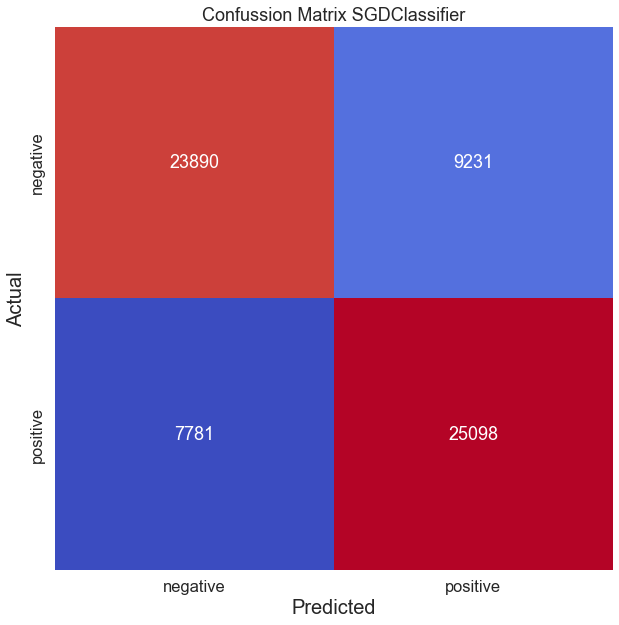

In [7]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)),
                            ])

parameters = {  'vect__ngram_range': [(1, 1), (1, 2)],
                'vect__stop_words':(None, stop_words),
                'tfidf__use_idf': (True, False),
                'clf__alpha': (1e-2, 1e-3),
                }


gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

y_pred = gs_clf.predict(X_test)
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=conf_matrix,
                           columns=['negative', 'positive'],
                           index=['negative', 'positive'])

# Plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, fmt='.5g', cbar=False)
plt.ylabel('Actual', size=20)
plt.xlabel('Predicted', size=20)

plt.title("Confussion Matrix SGDClassifier")

model_list = pd.DataFrame(['SGDClassifier' for i in range(16)])

df_results_SGD = pd.concat([pd.DataFrame(gs_clf.cv_results_["params"]),pd.DataFrame(gs_clf.cv_results_["mean_test_score"], columns=["Accuracy"]), model_list],axis=1)


df_results_SGD.sort_values('Accuracy')

/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,tfidf__use_idf,vect__ngram_range,vect__stop_words,Accuracy,0
0,True,"(1, 1)",None,0.788433,LinearSVC
1,True,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.769433,LinearSVC
2,True,"(1, 2)",None,0.806246,LinearSVC
3,True,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.782007,LinearSVC
4,False,"(1, 1)",None,0.791813,LinearSVC
5,False,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.772597,LinearSVC
6,False,"(1, 2)",None,0.807575,LinearSVC
7,False,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.782231,LinearSVC


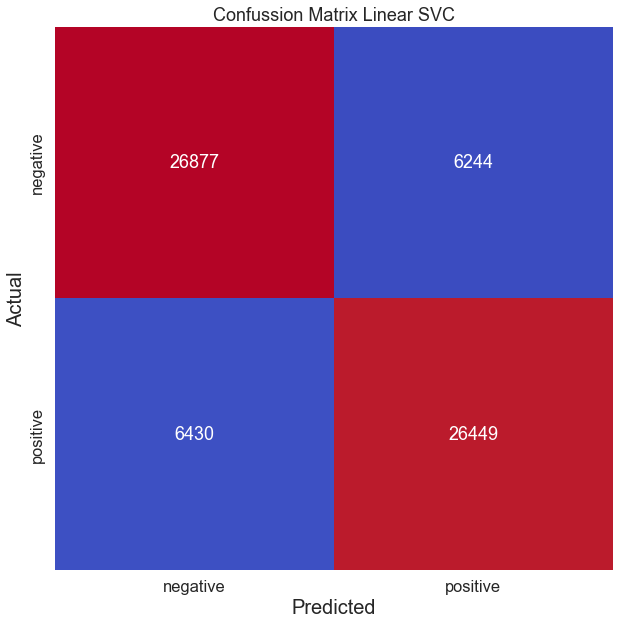

In [8]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', LinearSVC()),
                            ])

parameters = {  'vect__ngram_range': [(1, 1), (1, 2)],
                'vect__stop_words':(None, stop_words),
                'tfidf__use_idf': (True, False)
                }


gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

model_list = pd.DataFrame(['LinearSVC' for i in range(8)])

y_pred = gs_clf.predict(X_test)
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=conf_matrix,
                           columns=['negative', 'positive'],
                           index=['negative', 'positive'])

# Plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, fmt='.5g', cbar=False)
plt.ylabel('Actual', size=20)
plt.xlabel('Predicted', size=20)
plt.title("Confussion Matrix Linear SVC")

df_results_LinearSVC = pd.concat([pd.DataFrame(gs_clf.cv_results_["params"]),pd.DataFrame(gs_clf.cv_results_["mean_test_score"], columns=["Accuracy"]),model_list],axis=1)

df_results_LinearSVC

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

,tfidf__use_idf,vect__ngram_range,vect__stop_words,Accuracy,0
0,True,"(1, 1)",None,0.792612,Logistic Regression
1,True,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.774224,Logistic Regression
2,True,"(1, 2)",None,0.802522,Logistic Regression
3,True,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.778022,Logistic Regression
4,False,"(1, 1)",None,0.788209,Logistic Regression
5,False,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.770933,Logistic Regression
6,False,"(1, 2)",None,0.798507,Logistic Regression
7,False,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.775403,Logistic Regression


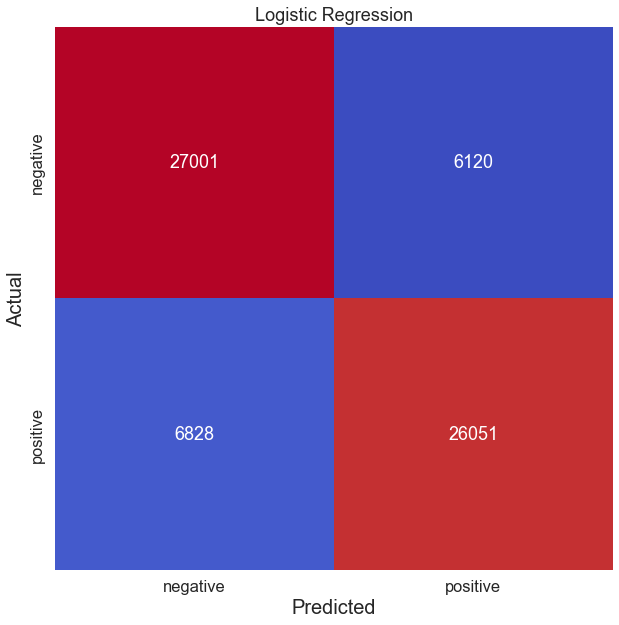

In [9]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', LogisticRegression(random_state=0)),
                            ])

parameters = {  'vect__ngram_range': [(1, 1), (1, 2)],
                'vect__stop_words':(None, stop_words),
                'tfidf__use_idf': (True, False)
                }


gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

y_pred = gs_clf.predict(X_test)
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=conf_matrix,
                           columns=['negative', 'positive'],
                           index=['negative', 'positive'])

# Plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, fmt='.5g', cbar=False)
plt.ylabel('Actual', size=20)
plt.xlabel('Predicted', size=20)

plt.title("Logistic Regression")

model_list = pd.DataFrame(['Logistic Regression' for i in range(8)])

df_results_LogisticReg = pd.concat([pd.DataFrame(gs_clf.cv_results_["params"]),pd.DataFrame(gs_clf.cv_results_["mean_test_score"], columns=["Accuracy"]),model_list],axis=1)
df_results_LogisticReg

In [10]:
''''
text_clf = Pipeline([
    ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', KNeighborsClassifier(3)),
                            ])

parameters = {  'vect__ngram_range': [(1, 1), (1, 2)],
                'tfidf__use_idf': (True, False)
                }


gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

y_pred = gs_clf.predict(X_test)
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=conf_matrix,
                           columns=['negative', 'positive'],
                           index=['negative', 'positive'])

# Plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, fmt='.5g', cbar=False)
plt.ylabel('Actual', size=20)
plt.xlabel('Predicted', size=20)
plt.title("Confussion Matrix KNClassifier")

model_list = pd.DataFrame(['KNC' for i in range(4)])

df_results_KN = pd.concat([pd.DataFrame(gs_clf.cv_results_["params"]),pd.DataFrame(gs_clf.cv_results_["mean_test_score"], columns=["Accuracy"]),model_list],axis=1)
df_results_KN
'''

'\'\ntext_clf = Pipeline([\n    (\'vect\', CountVectorizer()),\n     (\'tfidf\', TfidfTransformer()),\n     (\'clf\', KNeighborsClassifier(3)),\n                            ])\n\nparameters = {  \'vect__ngram_range\': [(1, 1), (1, 2)],\n                \'tfidf__use_idf\': (True, False)\n                }\n\n\ngs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)\ngs_clf = gs_clf.fit(X_train, y_train)\n\ny_pred = gs_clf.predict(X_test)\n# Create confusion matrix\nconf_matrix = confusion_matrix(y_test, y_pred)\nconf_matrix = pd.DataFrame(data=conf_matrix,\n                           columns=[\'negative\', \'positive\'],\n                           index=[\'negative\', \'positive\'])\n\n# Plot confusion matrix\nplt.figure(figsize=(10, 10), facecolor=\'w\', edgecolor=\'k\')\nsns.set(font_scale=1.5)\nsns.heatmap(conf_matrix, cmap=\'coolwarm\', annot=True, fmt=\'.5g\', cbar=False)\nplt.ylabel(\'Actual\', size=20)\nplt.xlabel(\'Predicted\', size=20)\nplt.title("Confussion Matrix KNClas

In [11]:
''''
text_clf = Pipeline([
    ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', DecisionTreeClassifier(max_depth=5)),
                            ])

parameters = {  'vect__ngram_range': [(1, 1), (1, 2)],
                'vect__stop_words':(None, stop_words),
                'tfidf__use_idf': (True, False)
                }


gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

y_pred = gs_clf.predict(X_test)
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=conf_matrix,
                           columns=['negative', 'positive'],
                           index=['negative', 'positive'])

# Plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, fmt='.5g', cbar=False)
plt.ylabel('Actual', size=20)
plt.xlabel('Predicted', size=20)

model_list = pd.DataFrame(['Decission Tree' for i in range(8)])
plt.title("Confussion Matrix Decision Tree Classifier")

df_results_DT  = pd.concat([pd.DataFrame(gs_clf.cv_results_["params"]),pd.DataFrame(gs_clf.cv_results_["mean_test_score"], columns=["Accuracy"]), model_list],axis=1)
df_results_DT

'''

'\'\ntext_clf = Pipeline([\n    (\'vect\', CountVectorizer()),\n     (\'tfidf\', TfidfTransformer()),\n     (\'clf\', DecisionTreeClassifier(max_depth=5)),\n                            ])\n\nparameters = {  \'vect__ngram_range\': [(1, 1), (1, 2)],\n                \'vect__stop_words\':(None, stop_words),\n                \'tfidf__use_idf\': (True, False)\n                }\n\n\ngs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)\ngs_clf = gs_clf.fit(X_train, y_train)\n\ny_pred = gs_clf.predict(X_test)\n# Create confusion matrix\nconf_matrix = confusion_matrix(y_test, y_pred)\nconf_matrix = pd.DataFrame(data=conf_matrix,\n                           columns=[\'negative\', \'positive\'],\n                           index=[\'negative\', \'positive\'])\n\n# Plot confusion matrix\nplt.figure(figsize=(10, 10), facecolor=\'w\', edgecolor=\'k\')\nsns.set(font_scale=1.5)\nsns.heatmap(conf_matrix, cmap=\'coolwarm\', annot=True, fmt=\'.5g\', cbar=False)\nplt.ylabel(\'Actual\', size=20)\np

,tfidf__use_idf,vect__ngram_range,vect__stop_words,Accuracy,0
0,True,"(1, 1)",None,0.769373,Multinomial NB
1,True,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.761478,Multinomial NB
2,True,"(1, 2)",None,0.788522,Multinomial NB
3,True,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.773060,Multinomial NB
4,False,"(1, 1)",None,0.773455,Multinomial NB
5,False,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.765627,Multinomial NB
6,False,"(1, 2)",None,0.784851,Multinomial NB
7,False,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.772500,Multinomial NB


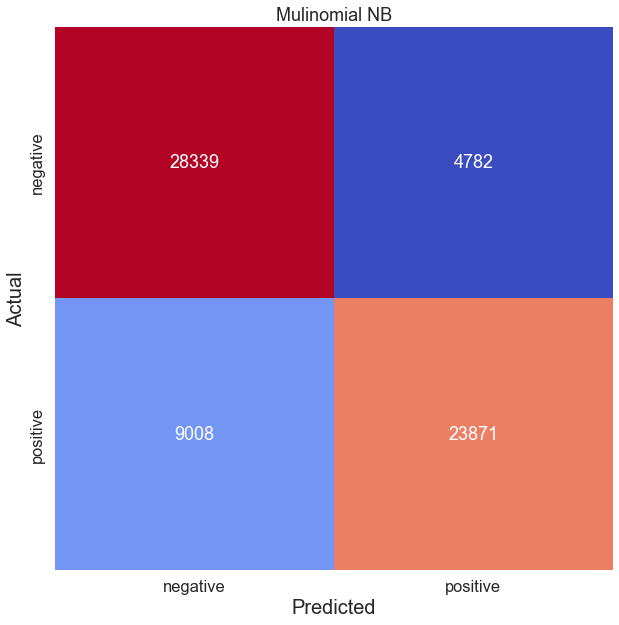

In [12]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()),
                            ])

parameters = {  'vect__ngram_range': [(1, 1), (1, 2)],
                'vect__stop_words':(None, stop_words),
                'tfidf__use_idf': (True, False)
                }


gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

y_pred = gs_clf.predict(X_test)
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=conf_matrix,
                           columns=['negative', 'positive'],
                           index=['negative', 'positive'])

# Plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, fmt='.5g', cbar=False)
plt.ylabel('Actual', size=20)
plt.xlabel('Predicted', size=20)
plt.title("Mulinomial NB")

model_list = pd.DataFrame(['Multinomial NB' for i in range(8)])

df_results_DT  = pd.concat([pd.DataFrame(gs_clf.cv_results_["params"]),pd.DataFrame(gs_clf.cv_results_["mean_test_score"], columns=["Accuracy"]),model_list],axis=1)
df_results_DT

In [13]:
results = [df_results_DT, df_results_LinearSVC,df_results_LogisticReg,df_results_SGD]

df_results = pd.concat(results)

df_results.sort_values('Accuracy' , ascending= False)

,tfidf__use_idf,vect__ngram_range,vect__stop_words,Accuracy,0,clf__alpha
6,False,"(1, 2)",None,0.807575,LinearSVC,NaN
2,True,"(1, 2)",None,0.806246,LinearSVC,NaN
2,True,"(1, 2)",None,0.802522,Logistic Regression,NaN
6,False,"(1, 2)",None,0.798507,Logistic Regression,NaN
0,True,"(1, 1)",None,0.792612,Logistic Regression,NaN
4,False,"(1, 1)",None,0.791813,LinearSVC,NaN
2,True,"(1, 2)",None,0.788522,Multinomial NB,NaN
0,True,"(1, 1)",None,0.788433,LinearSVC,NaN
4,False,"(1, 1)",None,0.788209,Logistic Regression,NaN
6,False,"(1, 2)",None,0.784851,Multinomial NB,NaN


In [14]:
print(stemming(list(df_tweet['text'])[0]))
print(list(df_tweet['text'])[0])

switchfoot http twitpic com 2y1zl awww that bummer you shoulda got david carr of third day to do it
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,tfidf__use_idf,vect__ngram_range,vect__stop_words,Accuracy,0
0,True,"(1, 1)",None,0.788433,LinearSVC
1,True,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.769433,LinearSVC
2,True,"(1, 2)",None,0.806246,LinearSVC
3,True,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.782007,LinearSVC
4,False,"(1, 1)",None,0.791813,LinearSVC
5,False,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.772590,LinearSVC
6,False,"(1, 2)",None,0.807575,LinearSVC
7,False,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.782231,LinearSVC


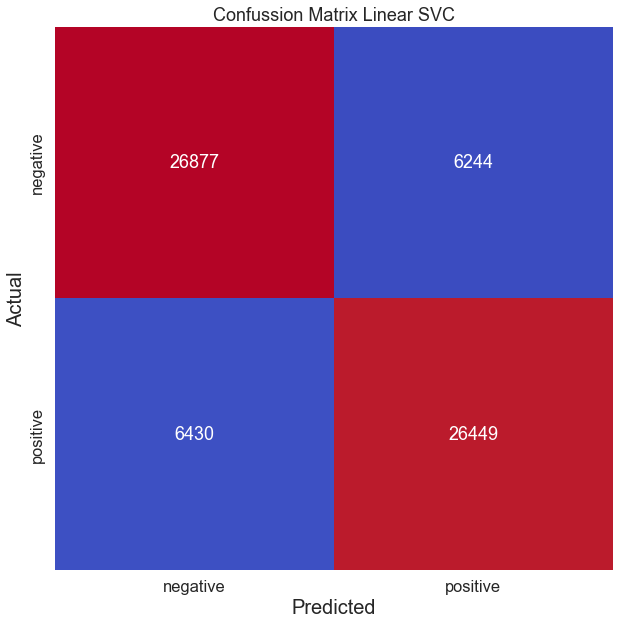

In [15]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', LinearSVC()),
                            ])

parameters = {  'vect__ngram_range': [(1, 1), (1, 2)],
                'vect__stop_words':(None, stop_words),
                'tfidf__use_idf': (True, False)
                }


gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

model_list = pd.DataFrame(['LinearSVC' for i in range(8)])

y_pred = gs_clf.predict(X_test)
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=conf_matrix,
                           columns=['negative', 'positive'],
                           index=['negative', 'positive'])

# Plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, fmt='.5g', cbar=False)
plt.ylabel('Actual', size=20)
plt.xlabel('Predicted', size=20)
plt.title("Confussion Matrix Linear SVC")

df_results_LinearSVC = pd.concat([pd.DataFrame(gs_clf.cv_results_["params"]),pd.DataFrame(gs_clf.cv_results_["mean_test_score"], columns=["Accuracy"]),model_list],axis=1)

df_results_LinearSVC

,tfidf__use_idf,vect__ngram_range,vect__stop_words,Accuracy,0
0,True,"(1, 1)",None,0.788433,LinearSVC
1,True,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.769433,LinearSVC
2,True,"(1, 2)",None,0.806246,LinearSVC
3,True,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.782007,LinearSVC
4,False,"(1, 1)",None,0.791813,LinearSVC
5,False,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.772590,LinearSVC
6,False,"(1, 2)",None,0.807575,LinearSVC
7,False,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.782231,LinearSVC


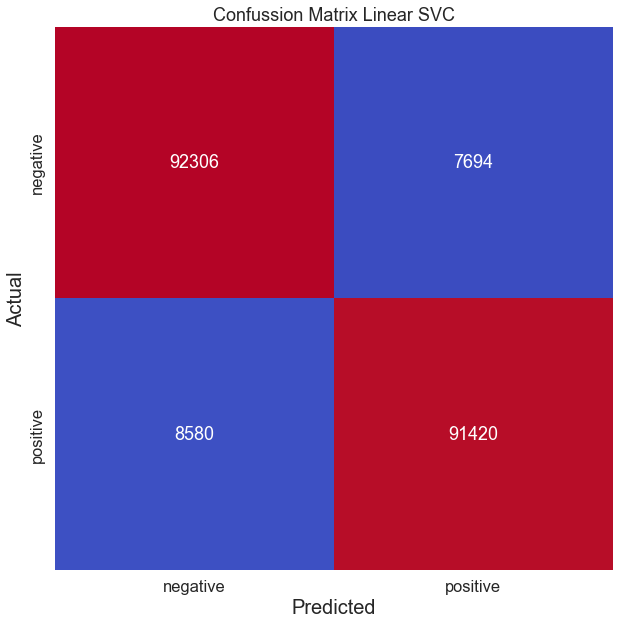

In [19]:
#This is the best Model
text_clf = Pipeline([
    ('vect', CountVectorizer(ngram_range= (1,2))),
     ('tfidf', TfidfTransformer(use_idf=False)),
     ('clf', LinearSVC()),
                            ])

X = list(data['text'])
y = list(data['sentiment'])


text_clf.fit(X, y)

y_pred = gs_clf.predict(X)
# Create confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
conf_matrix = pd.DataFrame(data=conf_matrix,
                           columns=['negative', 'positive'],
                           index=['negative', 'positive'])

# Plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, fmt='.5g', cbar=False)
plt.ylabel('Actual', size=20)
plt.xlabel('Predicted', size=20)
plt.title("Confussion Matrix Linear SVC")

df_results_LinearSVC = pd.concat([pd.DataFrame(gs_clf.cv_results_["params"]),pd.DataFrame(gs_clf.cv_results_["mean_test_score"], columns=["Accuracy"]),model_list],axis=1)

df_results_LinearSVC


In [24]:
df_tw  = pd.read_csv("/Users/crisandres/Documents/ErdosProject/AustralianElections/Data/PreProData.csv")

In [25]:
df_tw['tweet_prepro'] = [tweet_preprocess(tw) for tw in list(df_tw['tweet'])]

In [40]:
labels_tweets = list(text_clf.predict(list(df_tw['tweet_prepro'])))

In [41]:
for i in range(len(labels_tweets)):
    if labels_tweets[i] == 0:
        labels_tweets[i] = 'negative'
    else:
        labels_tweets[i] = 'positive'

In [44]:
our_labels = pd.DataFrame(labels_tweets)

our_labels.to_csv('Data/our_labels.csv', index=False)